#INSIGHTS
1. Most layoffs occurred between late 2022–early 2023.
2. Consumer and Retail sectors had the most layoffs.
3. The U.S. dominates layoff counts globally.
4. There’s no strong correlation between funding and % laid off.
5. Even highly funded companies laid off 100% of their workforce.

#Libraries and Set up

In [1]:
# 📦 Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Mounting & loading dataset

In [2]:
# 📁 Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/ Layoff Analysis/layoffs.csv')

#Data Cleaning

In [3]:
# 🧹 Data Cleaning
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['percentage_laid_off'] = pd.to_numeric(df['percentage_laid_off'].str.replace('%', ''), errors='coerce')
df['funds_raised'] = pd.to_numeric(df['funds_raised'].replace('[\$,]', '', regex=True), errors='coerce')



In [4]:
print(df.shape)

(4074, 11)


In [5]:
# 🧹 Additional Cleaning: Drop irrelevant rows with critical missing data

# Drop rows where both total_laid_off and percentage_laid_off are missing
df = df.dropna(subset=['total_laid_off', 'percentage_laid_off'], how='all')

# Drop rows with missing 'industry', 'location', 'stage', or 'source'
df = df.dropna(subset=['industry', 'location', 'stage', 'source'])

# Drop rows with missing 'funds_raised' for specific analysis later:
df = df.dropna(subset=['funds_raised'])

# 🔢 Print updated shape
print("✅ Updated data points (rows, columns):", df.shape)


✅ Updated data points (rows, columns): (3048, 11)


#Descriptive Analysis

In [6]:
# 📊 Descriptive stats for numeric columns only excluding datetime
print("📈 Numeric Column Summary:")
numeric_cols = df.select_dtypes(include='number').columns
print(df[numeric_cols].describe())
# 📋 Descriptive stats for categorical columns only
print("\n📋 Categorical Column Summary:")
print(df.describe(include=['object']))


📈 Numeric Column Summary:
       total_laid_off  percentage_laid_off   funds_raised
count     2398.000000          2318.000000    3048.000000
mean       265.728941            27.939172     835.651247
std        966.020463            28.781366    4908.573095
min          3.000000             0.000000       0.000000
25%         40.000000            10.000000      52.000000
50%         81.000000            17.000000     173.000000
75%        190.750000            30.000000     483.000000
max      22000.000000           100.000000  121900.000000

📋 Categorical Column Summary:
       company     location industry         source     stage        country
count     3048         3048     3048           3048      3048           3048
unique    2138          210       30           2892        16             56
top     Amazon  SF Bay Area  Finance  Internal memo  Post-IPO  United States
freq         9          812      387             74       714           1991


#Monthly Layoff Trend

<ipython-input-7-cb349a94a0e0>:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


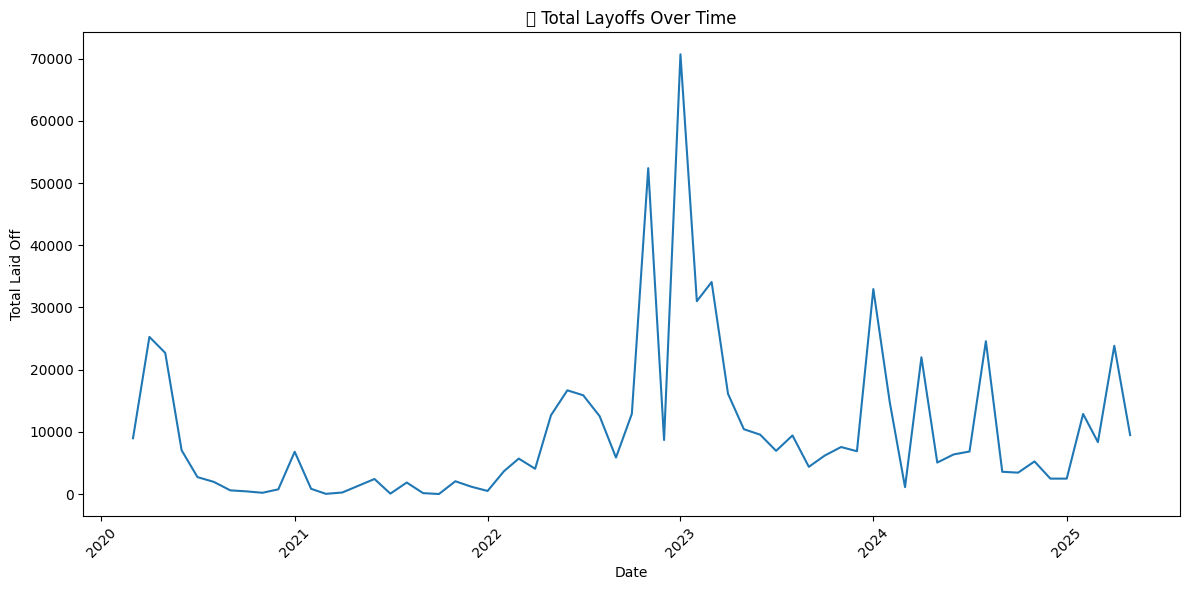

In [7]:
# 📈 Monthly Layoffs Trend
monthly_layoffs = df.groupby(df['date'].dt.to_period("M"))['total_laid_off'].sum().reset_index()
monthly_layoffs['date'] = monthly_layoffs['date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_layoffs, x='date', y='total_laid_off')
plt.title('📉 Total Layoffs Over Time')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
print(monthly_layoffs.head(12))  # See the first 12 months

         date  total_laid_off
0  2020-03-01          8981.0
1  2020-04-01         25271.0
2  2020-05-01         22699.0
3  2020-06-01          7046.0
4  2020-07-01          2737.0
5  2020-08-01          1969.0
6  2020-09-01           609.0
7  2020-10-01           450.0
8  2020-11-01           219.0
9  2020-12-01           774.0
10 2021-01-01          6813.0
11 2021-02-01           855.0


# Industry layoff

<ipython-input-9-54e962551a98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-54e962551a98>:7: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


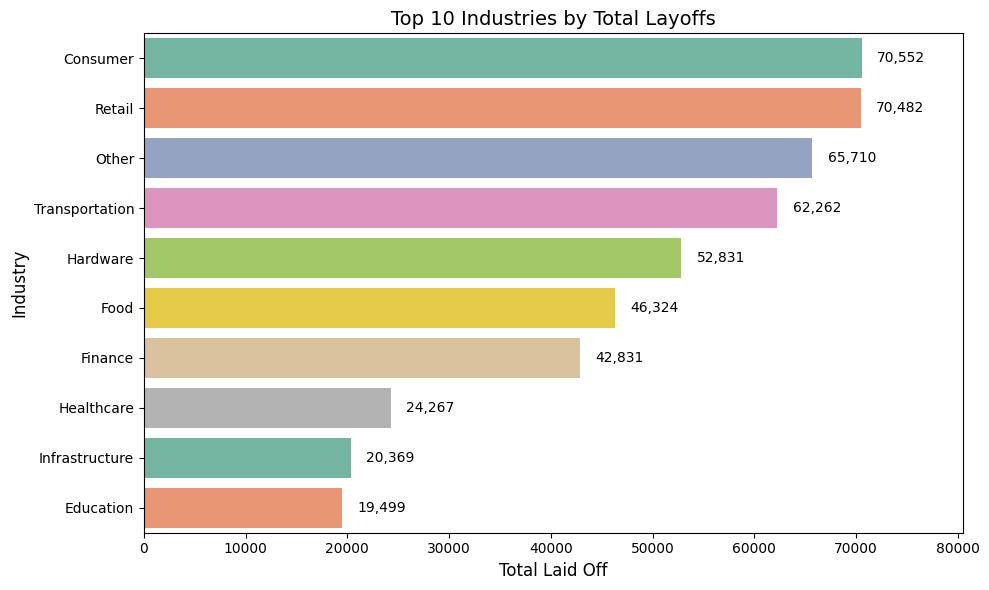

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

industry_layoffs = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=industry_layoffs.values,
    y=industry_layoffs.index,
    palette=sns.color_palette("Set2")
)

# Annotate bars
for i, value in enumerate(industry_layoffs.values):
    plt.text(value + 1500, i, f"{int(value):,}", va='center', fontsize=10)  # extra space

# Title and labels
plt.title('Top 10 Industries by Total Layoffs', fontsize=14)
plt.xlabel('Total Laid Off', fontsize=12)
plt.ylabel('Industry', fontsize=12)

# Extend x-axis limit for better label spacing
plt.xlim(0, industry_layoffs.values[0] + 10000)  # Add padding to the max value

plt.tight_layout()
plt.show()


#Top Countries

<ipython-input-10-2bd230578b9f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-2bd230578b9f>:8: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


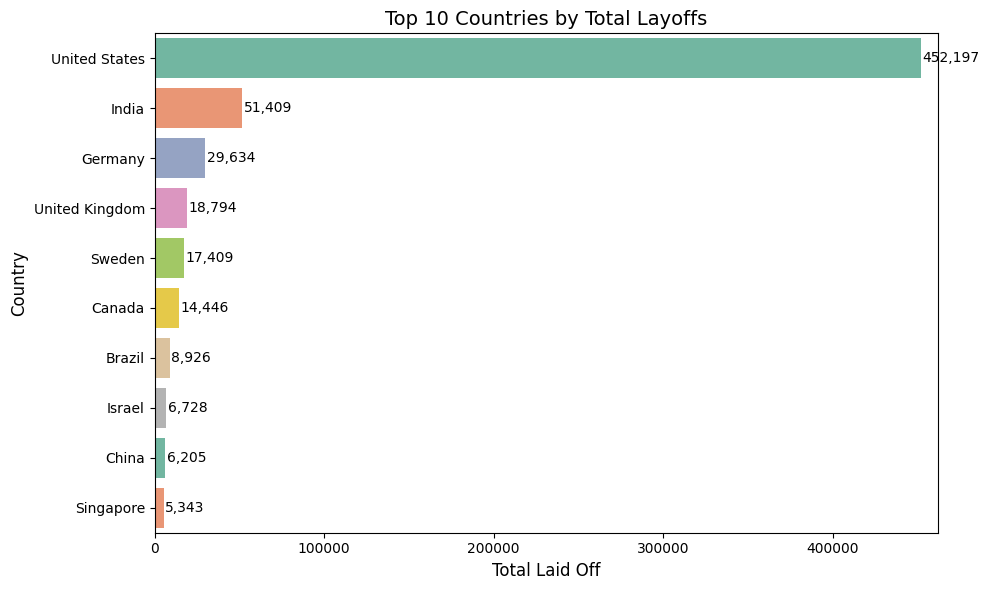

In [10]:
# 🌍 Top Countries by Total Layoffs (with colorful bars + labels)
import seaborn as sns
import matplotlib.pyplot as plt

country_layoffs = df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_layoffs.values,
    y=country_layoffs.index,
    palette=sns.color_palette("Set2")
)

# Annotate with values
for i, value in enumerate(country_layoffs.values):
    plt.text(value + 1000, i, f"{int(value):,}", va='center', fontsize=10)

# Adjust plot labels and spacing
plt.title('Top 10 Countries by Total Layoffs', fontsize=14)
plt.xlabel('Total Laid Off', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xlim(0, country_layoffs.values[0] + 10000)

plt.tight_layout()
plt.show()



#Funding Vs Layoffs

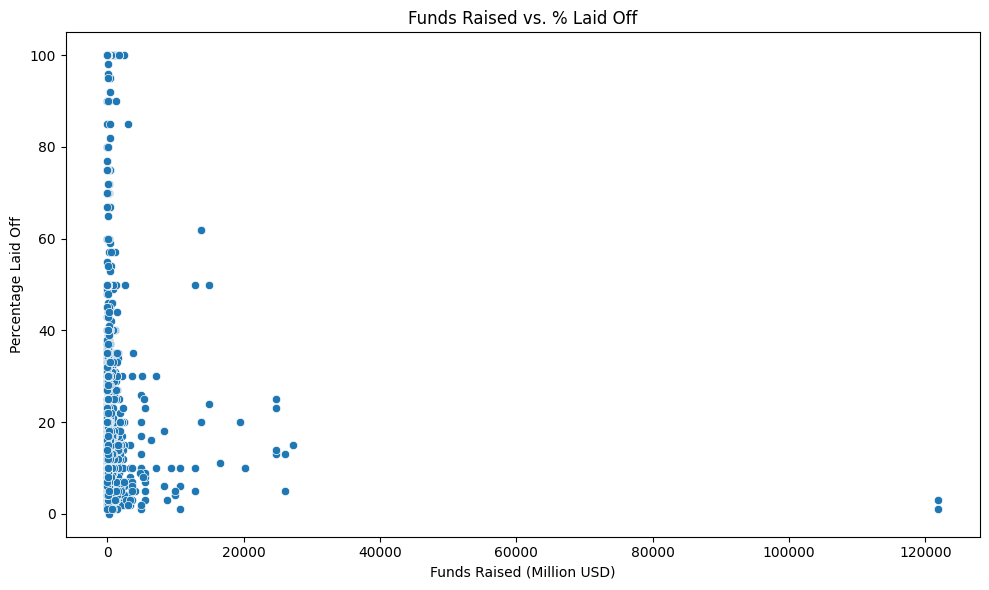

In [11]:
# 💸 Funding vs. % Layoffs
funding_layoffs = df[['funds_raised', 'percentage_laid_off']].dropna()

plt.figure(figsize=(10,6))
sns.scatterplot(data=funding_layoffs, x='funds_raised', y='percentage_laid_off')
plt.title('Funds Raised vs. % Laid Off')
plt.xlabel('Funds Raised (Million USD)')
plt.ylabel('Percentage Laid Off')
plt.tight_layout()
plt.show()

In [12]:
print(funding_layoffs.corr())

                     funds_raised  percentage_laid_off
funds_raised             1.000000            -0.073834
percentage_laid_off     -0.073834             1.000000


#Adding industry as a hue to the scatter plot

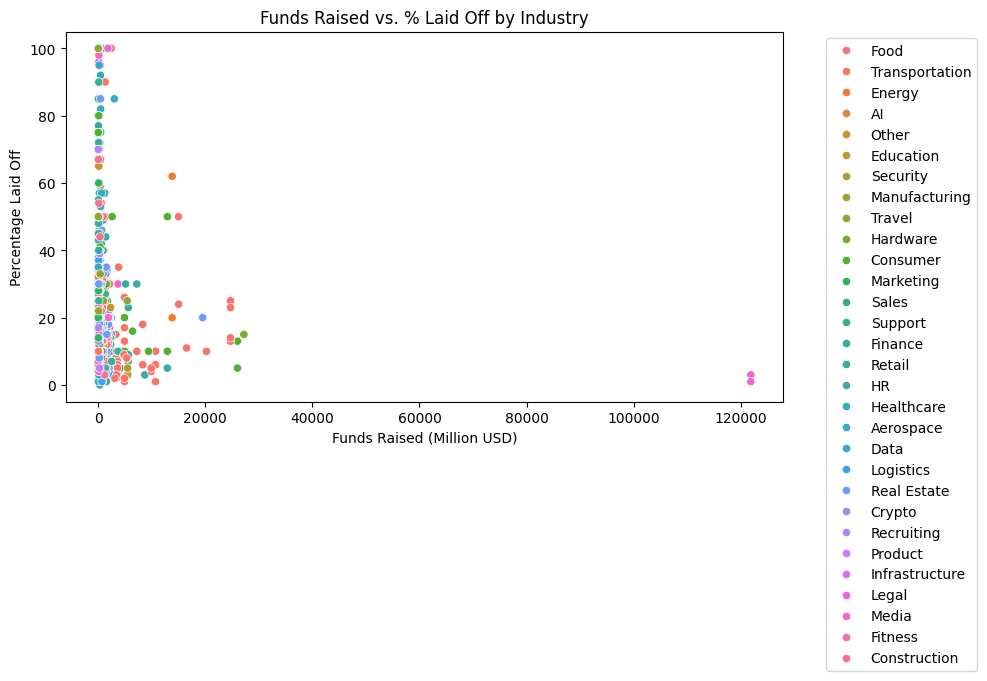

In [14]:
# 💸 Funding vs. % Layoffs (with Industry Hue)

#add industry as a hue to the previous scatter plot
# You need to include the 'industry' column when creating the subset
funding_layoffs_with_industry = df[['funds_raised', 'percentage_laid_off', 'industry']].dropna()

plt.figure(figsize=(10,6))
# Pass the DataFrame to the 'data' argument and specify x, y, and hue columns
sns.scatterplot(data=funding_layoffs_with_industry, x='funds_raised', y='percentage_laid_off', hue='industry')
plt.title('Funds Raised vs. % Laid Off by Industry')
plt.xlabel('Funds Raised (Million USD)')
plt.ylabel('Percentage Laid Off')
# Adjust legend position if needed to avoid overlapping points
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Highlight Peak Month in Time Series Chart

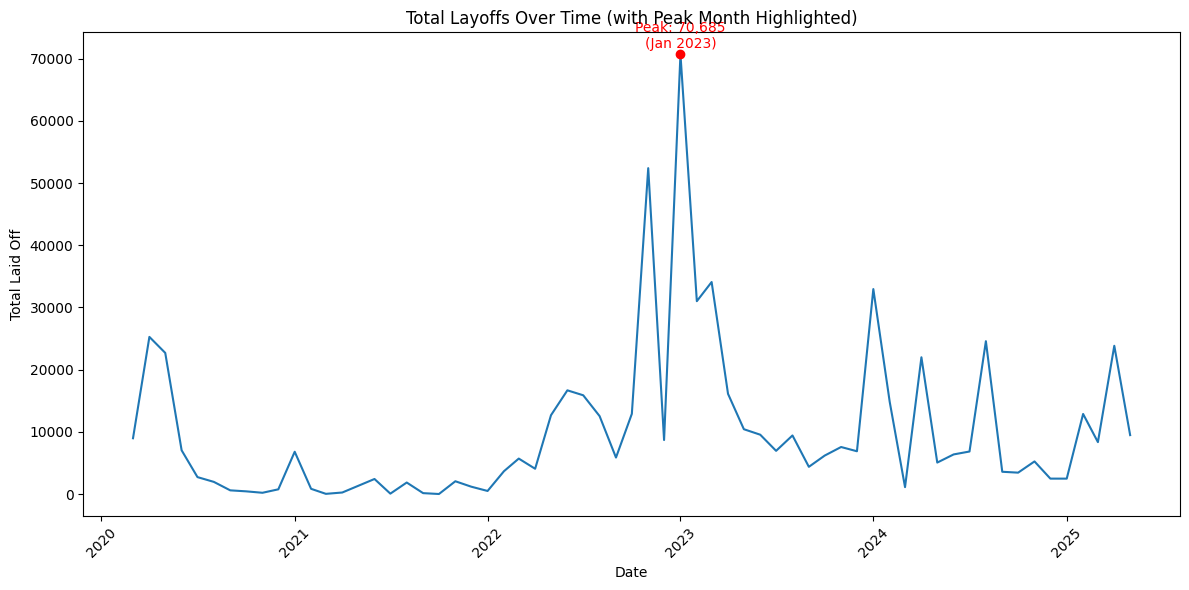

In [16]:
# Highlight the peak layoff month
monthly_layoffs = df.groupby(df['date'].dt.to_period("M"))['total_laid_off'].sum().reset_index()
monthly_layoffs['date'] = monthly_layoffs['date'].dt.to_timestamp()

peak_row = monthly_layoffs.loc[monthly_layoffs['total_laid_off'].idxmax()]

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_layoffs, x='date', y='total_laid_off')
plt.scatter(peak_row['date'], peak_row['total_laid_off'], color='red', zorder=5)
plt.text(peak_row['date'], peak_row['total_laid_off'] + 1000,
         f"Peak: {int(peak_row['total_laid_off']):,}\n({peak_row['date'].strftime('%b %Y')})",
         color='red', ha='center')
plt.title('Total Layoffs Over Time (with Peak Month Highlighted)')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Company Stage vs Average % Laid Off

<ipython-input-20-0950ee3d0e98>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-20-0950ee3d0e98>:5: UserWarning:


The palette list has fewer values (8) than needed (16) and will cycle, which may produce an uninterpretable plot.



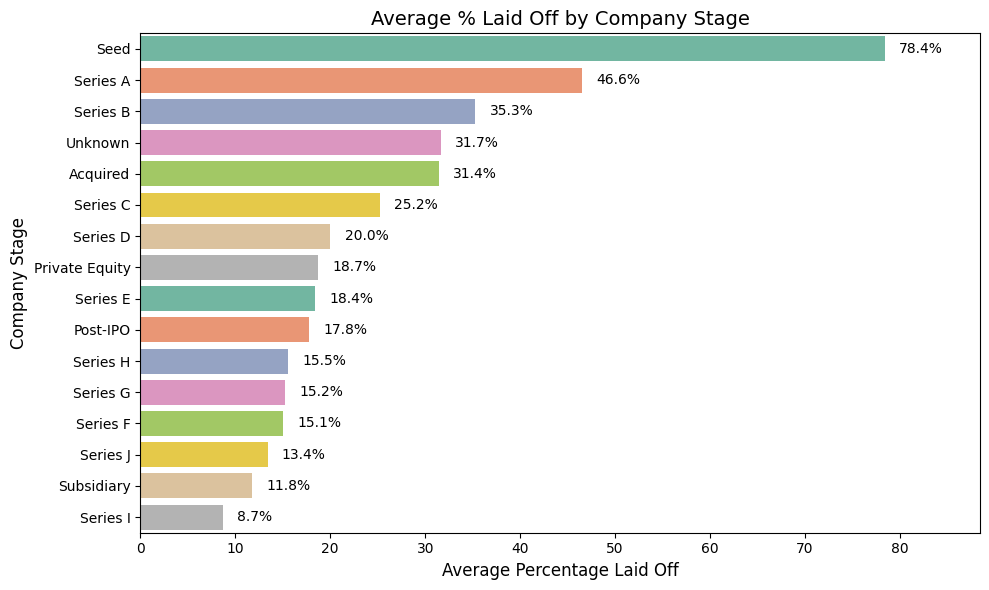

In [20]:
# Compare average percentage laid off across funding stages
stage_layoffs = df.groupby('stage')['percentage_laid_off'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=stage_layoffs.values,
    y=stage_layoffs.index,
    palette=sns.color_palette("Set2")
)

# Annotate bars with values
for i, value in enumerate(stage_layoffs.values):
    plt.text(value + 1.5, i, f"{value:.1f}%", va='center', fontsize=10)

# Title and labels
plt.title('Average % Laid Off by Company Stage', fontsize=14)
plt.xlabel('Average Percentage Laid Off', fontsize=12)
plt.ylabel('Company Stage', fontsize=12)

# Extend x-axis for spacing
plt.xlim(0, stage_layoffs.values[0] + 10)

plt.tight_layout()
plt.show()


#Top 10 Industries by % Laid Off

<ipython-input-21-ce6e9c6eeb7c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-ce6e9c6eeb7c>:5: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.



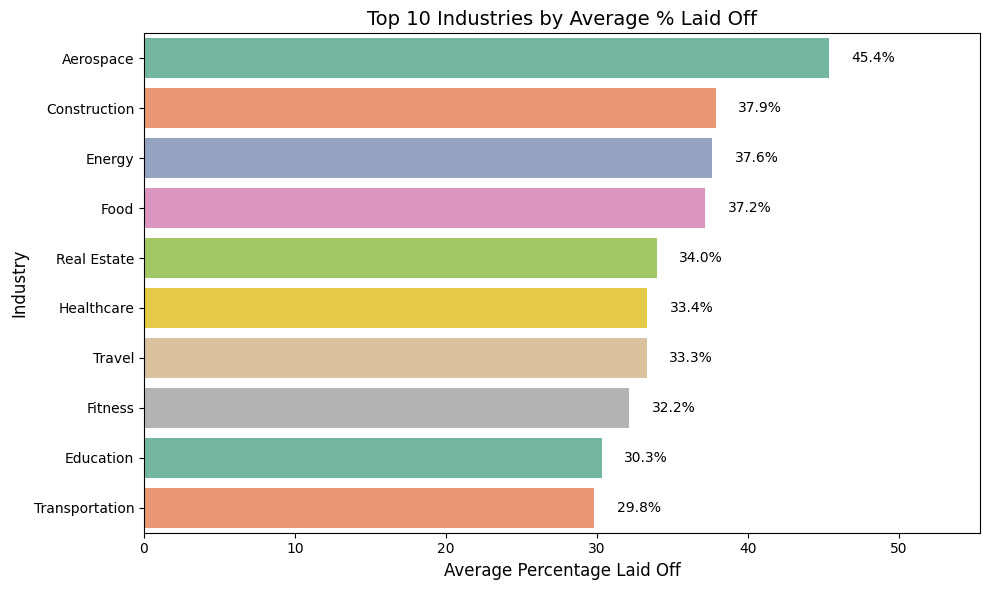

In [21]:
# Industries with the highest average layoff percentage
industry_percentage = df.groupby('industry')['percentage_laid_off'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=industry_percentage.values,
    y=industry_percentage.index,
    palette=sns.color_palette("Set2")
)

# Annotate bars with values
for i, value in enumerate(industry_percentage.values):
    plt.text(value + 1.5, i, f"{value:.1f}%", va='center', fontsize=10)

# Title and labels
plt.title('Top 10 Industries by Average % Laid Off', fontsize=14)
plt.xlabel('Average Percentage Laid Off', fontsize=12)
plt.ylabel('Industry', fontsize=12)

# Extend x-axis for spacing
plt.xlim(0, industry_percentage.values[0] + 10)

plt.tight_layout()
plt.show()


#Interactive Plotly Dashboard: Funding vs % Laid Off by Industry

In [19]:
# Install plotly
!pip install plotly --quiet

import plotly.express as px

# Interactive scatterplot of funding vs % laid off
funding_layoffs_interactive = df[['funds_raised', 'percentage_laid_off', 'industry']].dropna()

fig = px.scatter(
    funding_layoffs_interactive,
    x='funds_raised',
    y='percentage_laid_off',
    color='industry',
    title='💸 Interactive: Funding vs. % Laid Off by Industry',
    labels={'funds_raised': 'Funds Raised (Million USD)', 'percentage_laid_off': '% Laid Off'},
    hover_data=['industry']
)

fig.update_layout(height=600, width=1000)
fig.show()
